# Глава 2. Полный проект машинного обучения

Основные шаги:
- Выяснение общей картины;
- Получение данных;
- Обнаружение и визуализация данных для понимания их сущности;
- Подготовка данных для алгоритмов машинного обучения;
- Выбор модели и ее обучение;
- Точная настройка модели;
- Представление своего решения;
- Запуск, наблюдение и сопровождение системы.

## Выяснение общей картины

Первой задачей разберем построение модели цен на жилье. Данные имеют метрики: население, медианный доход, средняя стоимость дома и т.д. Модель должна обучаться на таких данных и быть способной прогнозировать среднюю стоимость дома.

### Постановка задачи

Что представляет бизнес-задача? Каким образом компания расчитывает применять и извлекать пользу от модели?

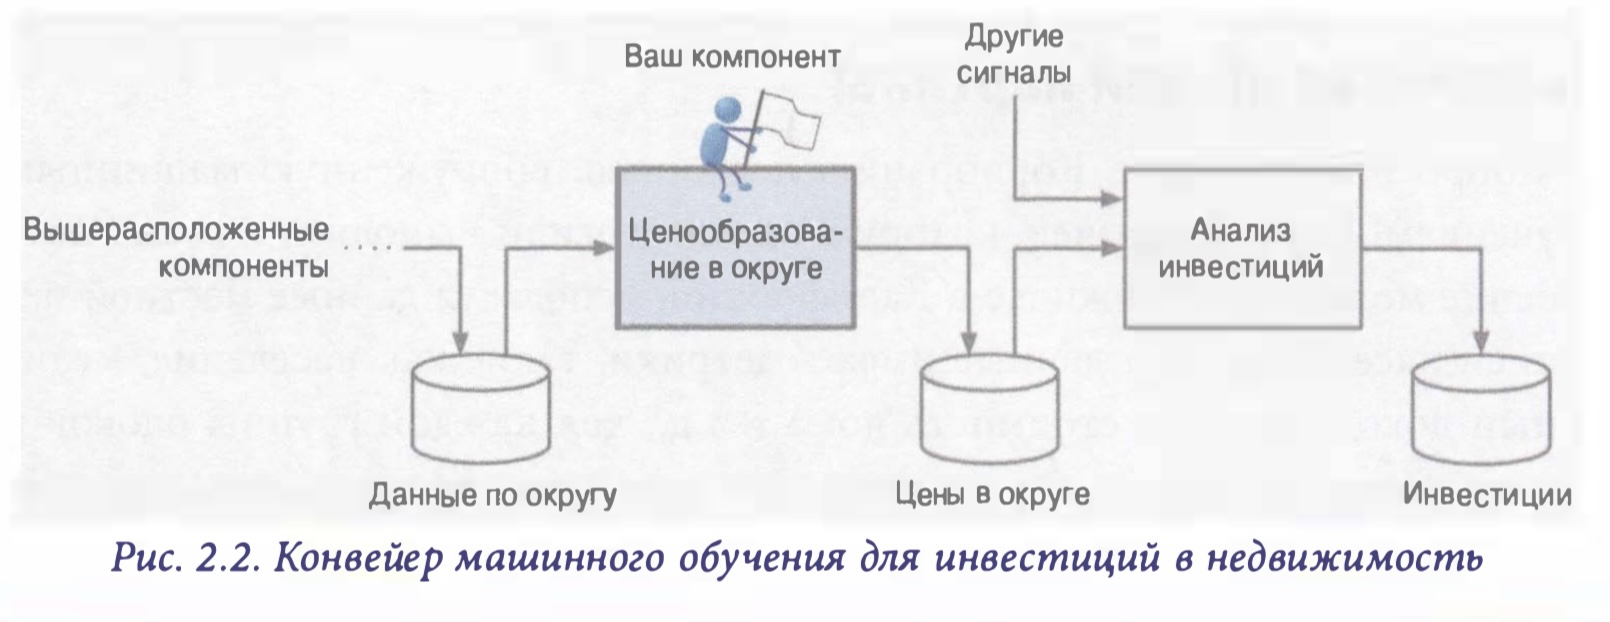

__Конвейеры__

Последовательность _компонентов_ обработки данных называются __конвейером__. Конвейеры очень распространены в системах МО. Компоненты обычно выполняются асинхронно. Каждый компонент захватывает массу данных, обрабатывает их и выдает результат в другое хранилище данных, после чего некоторое время спустя следующий компонент в конвейере захватывает это данные и выдает собственный вывод и т.д. Каждый компонент довольно самодостаточен: в качестве интерфейса между компонентами выступает хранилище данных.

Прежде всего необходимо определиться с задачей: она будет обучением с учитилем, обучением без учителя или обучением с подкреплением? Это задача классификации, задача регрессии или что-то еще? Использовать технологии пакетного обучения или динамического обучения?

Типичной задачей  обучения с учителем это задача одномерной регрессии (_univariate regression_) или многомерной регрессии(_multivariate regression_). 

Отсутствие непрерывного потока поступающих в систему данных, нет специфической потребности в быстром приспосабливании к меняющимся данным, для этого должно прекрасно подойти простое пакетное обучение.

Если бы данные были гигансткими, тогда можно было бы разнести работу пакетного обучения на несколько серверов с помощью MapReduce, либо взамен использовать прием динамического обучения.

### Выбор критерия качества работы

Следующий шаг - это выбор критерия качества работы. Типичный критерий качества для задач регрессии - _квадратный корень из среднеквадратической ошибки (Root Mean Squared Error - RMSE)_

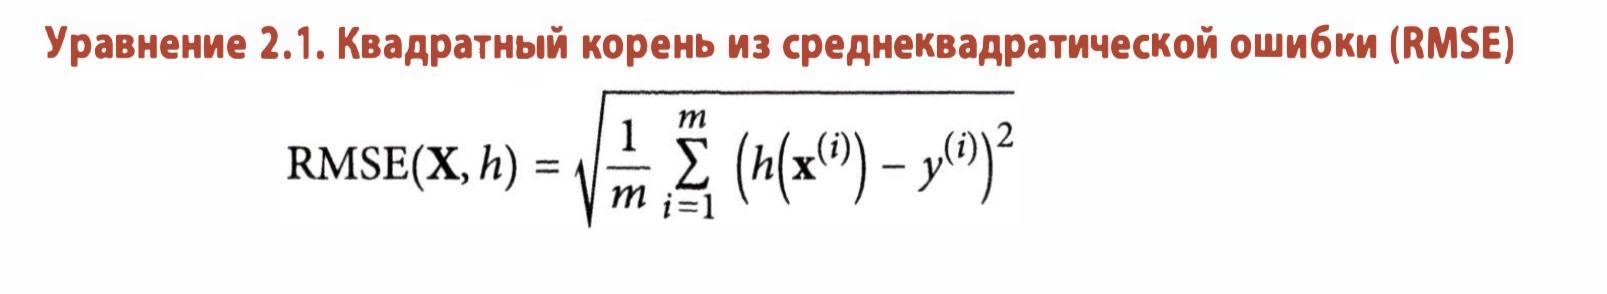

m - количество образцов в наборе данных;

x^(i) - вектор всех значений признаков i-го образца в наборе данных;

y^(i) - метка;

Х - матрица, содержащая все значения признаков;

h - функция прогнозирования системы, также называемая _гипотезой (hypothesis)_;

RMSE(X, h) - функция издержек, измеренная на наборе образцов с использованием гипотезы h.

Можно использовать и другую функцию. При многочисленных выбросах в данных, можно применить _среднюю абсолютную ошибку (Mean Absolute Error - MAE)_, также известную как _среднее абсолютное отклонение (average absolute deviation)_.

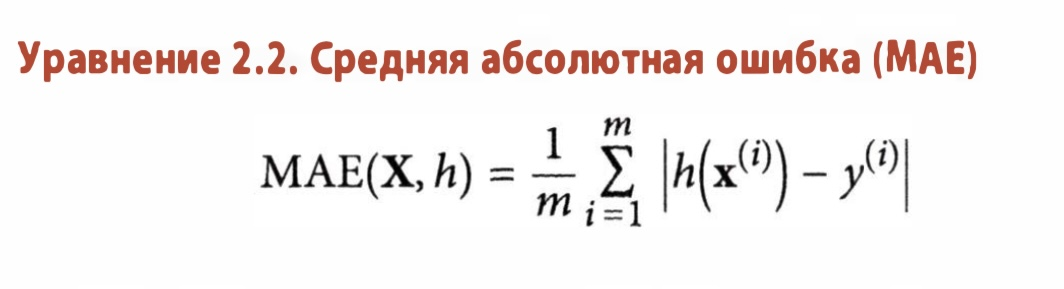

Показатели RMSE и MAE представляют собой способы измерения расстояния между двумя векторами: вектором прогнозов и вектором целевых значений. Существуют разнообразные меры расстояния или нормы:
* Вычисление квадратного корня из суммы квадратов (RMSE) соответствует _евклидовой норме (euclidian norm)_, также называется нормой l_2 и обозначается ||.||2 (||.||)
* вычисление суммы абсолютных велечин (MAE) соответствует норме l_1 и обозначается как ||.||1, также известная как _норма Манхэттена (Manhattan norm)_
* норма l_k вектора v, содержащего n элементов, определяется как ||v||k = (|v_0|^k + |v_1|^k + ... + |v_n|^k)^(1/k). l_0 дает количество ненулевых элементов в векторе, а l_∞ - максимальную абсолютную величину в векторе
* Чем выше индекс нормы, тем больше она концентрируется на крупных значениях и пренебрегает мелкими значениями. Когда выбросы экспоненциально редкие (как в колокообразной кривой), ошибка RMSE работает очень хорошо и обычно является предпочтительной.

### Проверка допущений

Хорошая практика предусматривает перечисление и проверку допущений. Это может выявить серьезные проблемы на ранней стадии.

## Получение данных

### Создание рабочей области

Создание каталога рабочей области через терминал:

Для работы потребуется несколько модулей Python: Jupyter, NumPy, Pandas, Matplotlib, Scikit-Learn.

In [2]:
# функция извлечения данных

# в реальном проекте сохраняется в файле Python
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# вызов функции fetch_housing_data приводит к созданию каталога datasets/housing в рабочей области,
# загрузке файла housing.tgz
# извлечению из него файла housing.csv и его помещению в указанный каталог
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
# загрузить данные через Pandas

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
import pandas as pd

df = pd.read_csv('handson-ml-master/datasets/housing/housing.csv')

### Беглый взгляд на структуру данных

Метод info() полезен для получения краткого описания данных.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Метод __value\_counts()__ вернет результат, отсортированный в порядке убывания, так что первый элемент в коллекции будет самым встречаемым. NA-значения не включены в результат. Параметры: 
* normalize (bool, по умолчанию False) — если True, то возвращаемый объект будет содержать значения относительно частоты встречаемых значений, 
* sort (bool, по умолчанию True) — сортировка по частоте, 
* ascending (bool, по умолчанию False) — сортировка по возрастанию, 
* bins (int) — вместе подсчета значений группирует их по отрезкам, но это работает только с числовыми данными, 
* dropna (bool, по умолчанию True) — не включать количество NaN. 

df['name_column'].value_counts() — вернет количество уникальных совпадений в определенной колонке.

In [10]:
# какие категории существуют и сколько округов принадлежит к какой категории
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Метод _describe()_ отображает сводку по числовым атрибутам.

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Другой способ получить представление о данных предусматривает вычерчивание гистограммы для каждого числового атрибута.

Метод hist() вычертит гистограммы для всех числовых атрибутов. Параметры:
* column (str, по умолчанию по всему ДатаФрейму)- указывает по каким столбцам чертить гистограмму;
* by (object) - используется для формирования гистограмм по отдельным группам;
* grid (bool, по умолчанию True) - показывать ли линии сетки осей;
* xlabelsize (int, по умолчанию None) - если указано, изменяется размер метки по оси x;
* xrot (float, по умолчанию None) - вращение меток оси X. Например, значение 90 отображает метки x, повернутые на 90 градусов по часовой стрелке;
* ylabelsize (int, по умолчанию None) - если указано, изменяет размер метки по оси Y;
* yrot (float, по умолчанию None) - вращение меток оси Y. Например, значение 90 отображает метки y, повернутые на 90 градусов по часовой стрелке;
* ax (Matplotlib axes object, по умолчанию None) - оси для построения гистограммы;
* sharex (bool, по умолчанию True если ax не задано, иначе False) - в случае, если subplots = True, поделитесь осью x и установите невидимые метки оси x; по умолчанию имеет значение True, если ax имеет значение None, в противном случае False, если передается ax. Обратите внимание, что при передаче ax и sharex=True будут изменены все метки оси x для всех подграфиков на рисунке. True указывает, что гистограммы должны иметь одну и ту же ось X;
* sharey (bool, по умолчанию False) - если True, то поделитесь осью y и сделайте невидимыми некоторые метки оси y;
* figsize (tuple, optional) - размер создаваемой фигуры в дюймах. По умолчанию использует значение из matplotlib.rcParams;
* layout (tuple, optional) - кортеж (строки, столбцы) для размещения гистограмм;
* bins (int, по умолчанию 10) - количество ячеек гистограммы, которые будут использоваться. Если задано целое число, вычисляются и возвращаются интервалы +1 ребро интервала. Если бины являются последовательностью, задаются края бинов, включая левый край первого бина и правый край последнего бина. В этом случае бины возвращаются без изменений.
* color (object, по умолчанию blue) - меняет цвет столбиков;
* legend (bool, по умолчанию False) - показывать ли легенду.

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>]], dtype=object)

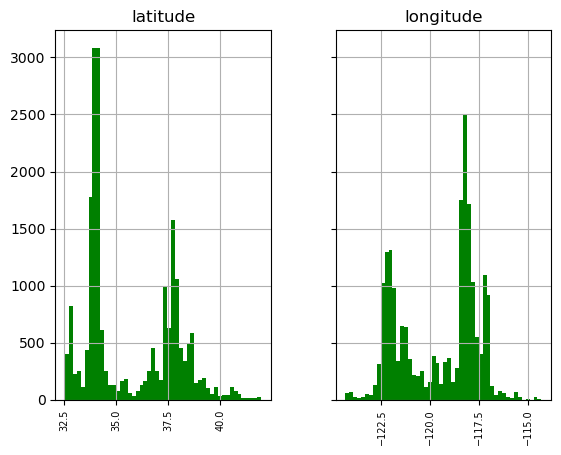

In [39]:
df.hist(column=['latitude', 'longitude'], color='green', bins=50, xlabelsize=7, xrot=90, sharey=True)

Нужно указать, какой сервер библиотека Matplotlib должна использовать. Простейший вариант - %matplotlib inline(только в Jupyter).

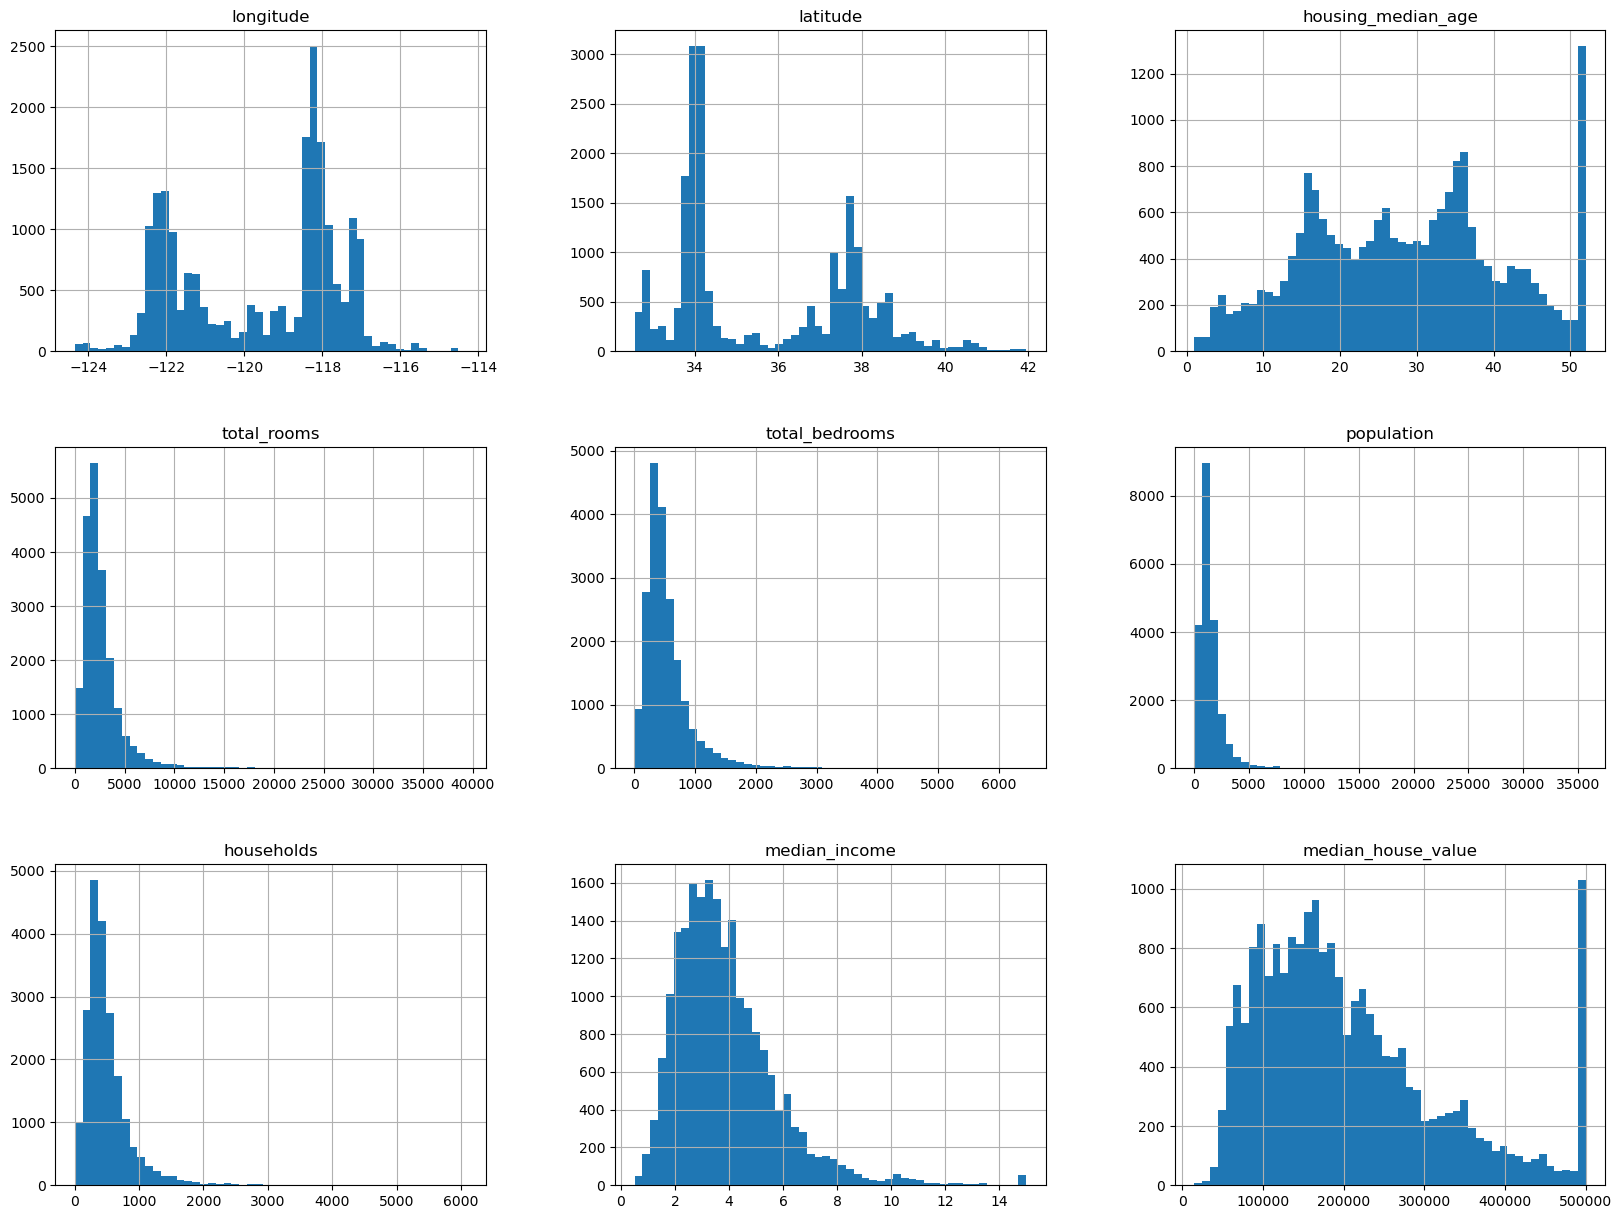

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))
plt.show()

Когда атрибуты имеют очень разные масштабы, производят масштабирование признаков.

Если гистограммы имеют _медленно убавающие хвосты (tail heavy)_ - это может несколько затруднить некоторым алгоритмам МО выявлять паттерны. Можно попытаться трансформировать такие атрибуты, чтобы получить более колокообразные распределения.

### Создание испытательного набора

Когда оценивается ошибка обощения, используя испытательный набор, оценка будет слишком оптимистичной и приведет к выпуску системы, которая не работает настолько хорошо, насколько ожидалось. Это называется смещением из-за _информационного просмотра данных (data snooping bias)_.

Создать испытательный набор довольно просто:

In [40]:
import numpy as np

def split_train_test(data, test_ratio):
    sheffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = sheffled_indices[:test_set_size]
    train_indices = sheffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [41]:
# применим функцию split_train_test
train_set, test_set = split_train_test(df, 0.2)
print(len(train_set), 'train +', len(test_set), 'test')

16512 train + 4128 test


Данная функция работает далеко от совершенства. Со временем алгоритмы МО увидят полный набор данных, чего стоит избежать.

Одно из решений заключается в сохранении испытательного набора после первого запуска и его загрузке при последующих запусках. Другой вариант, установить np.random.seed(42) до вызова np.random.permutation, чтобы он всегда генерировал те же самые перетасованные индексы.

Но оба решения перестанут работать, когда в следующий раз извлечется обновленный набор данных.

Новый метод используя хеш-функцию будет содержать 20% новых образцов, но не будет включать образцы, которые присутствовали в испытательном наборе ранее.

In [43]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

Но уже библиотеки Python предлагают готовые рещения данной задачи. Модуль Scikit-Learn предлагает несколько функций для разделения наборов данных на множество поднаборов разнообразными способами. Функция __train\_test\_split()__ (работает почти как выше написанная функция __split\_train\_test()__), она принимает параметр __random\_state__. Эта функция может передавать несколько наборов данных с одинаковыми количествами строк и она разобьет их по тем же самым индексам.

In [44]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

При соблюдении соотношений в выборке из генеральной совокупности, называется __стратифицированной выборкой (stratified sampling)__. Выборка делится на __страты (strata)__. В наборе данных важно иметь достаточное количество образцов для каждой страты, иначе оценка важности страты может быть смещена, другими словами, не должно создаваться слишком много страт, а каждая страта должна быть достаточно крупной.

In [45]:
df['income_cat'] = np.ceil(df['median_income'] / 1.5)
df['income_cat'].where(df['income_cat'] < 5, 5.0, inplace=True)

array([[<AxesSubplot:title={'center':'income_cat'}>]], dtype=object)

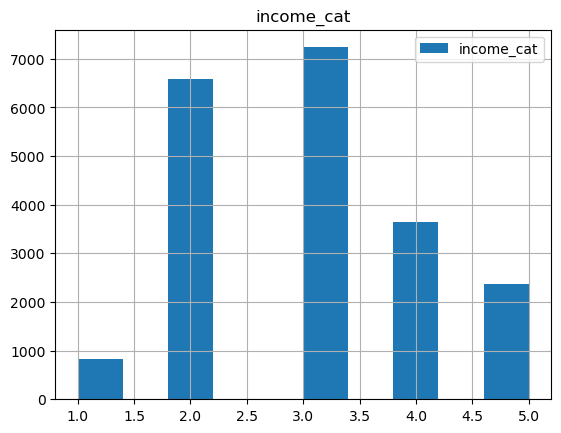

In [49]:
# гистограмма категорий дохода
df.hist(column='income_cat', legend=True)

Теперь все готово, чтобы делать стратифицированную выборку на основе категории дохода. Для этого можно использовать класс StratifiedShuffleSplit из Scikit-Learn.

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [51]:
df['income_cat'].value_counts() / len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

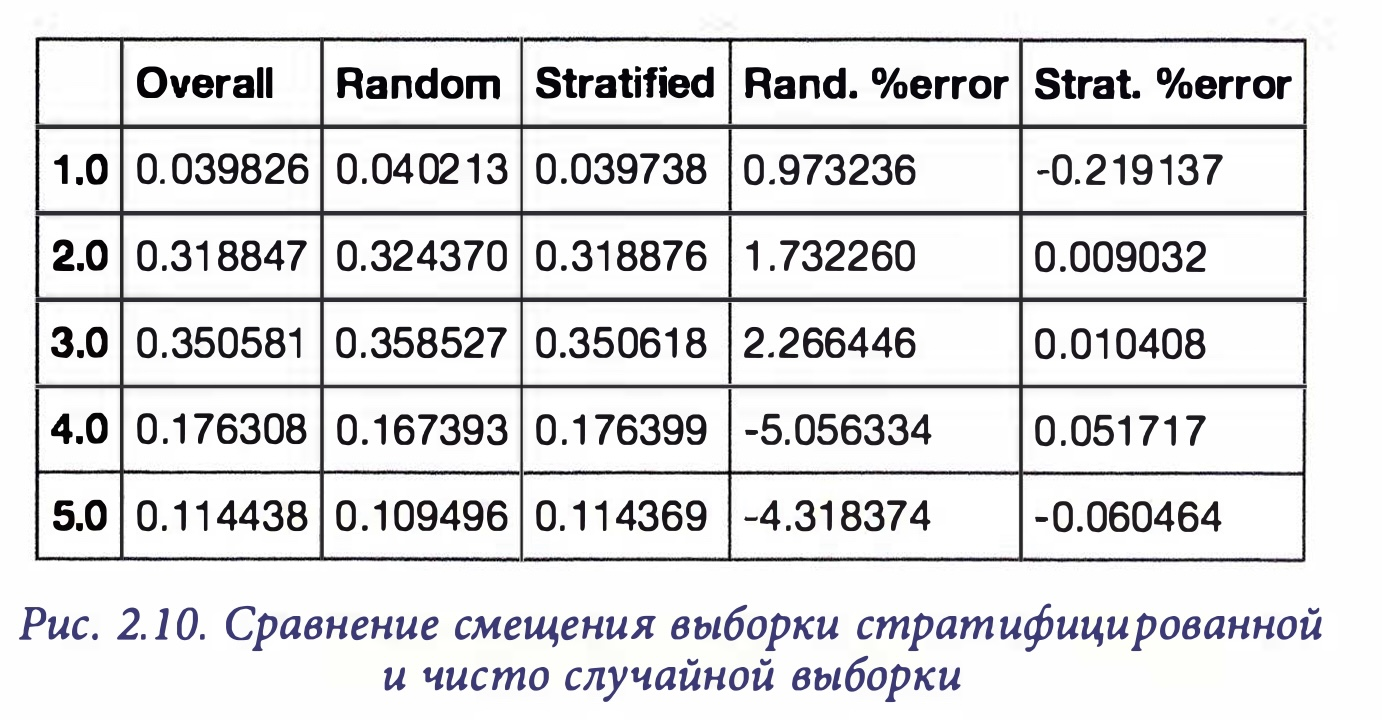

Теперь нужно удалить атрибут income_cat, чтобы позвратить данные обратно в первоначальное состояние.

In [53]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

Генерация испытательного набора критически важная часть проекта МО.

## Обнаружение и визуализация данных для понимания их сущности

Если обучающий набор очень крупный, тогда может появиться желание выполнять выборку из исследуемого набора, чтобы сделать манипуляции легкими и быстрыми.

In [54]:
# создадим копию
housing = strat_train_set.copy()

In [55]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


### Визуализация географических данных

Графическая информация - это визуализация данных.

<AxesSubplot:title={'center':'График рассеяния географических данных'}, xlabel='longitude', ylabel='latitude'>

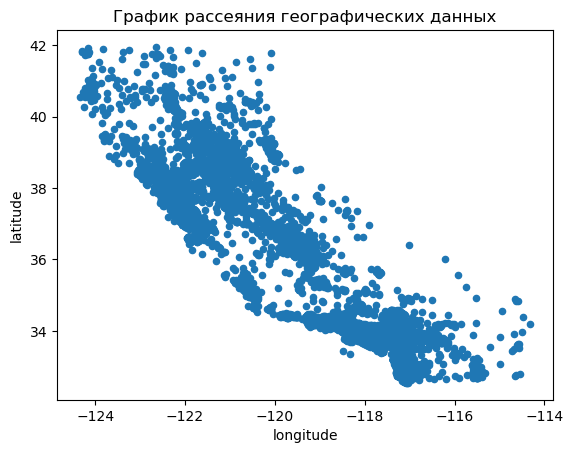

In [75]:
housing.plot(kind='scatter', x='longitude', y='latitude', title='График рассеяния географических данных')

Установка параметра alpha в 0.1 значительно облегчит обнаружение мест, где имеется высокая плотность точек данных

<AxesSubplot:title={'center':'Улучшенная визуализация выделяет области с высокой плотностью'}, xlabel='longitude', ylabel='latitude'>

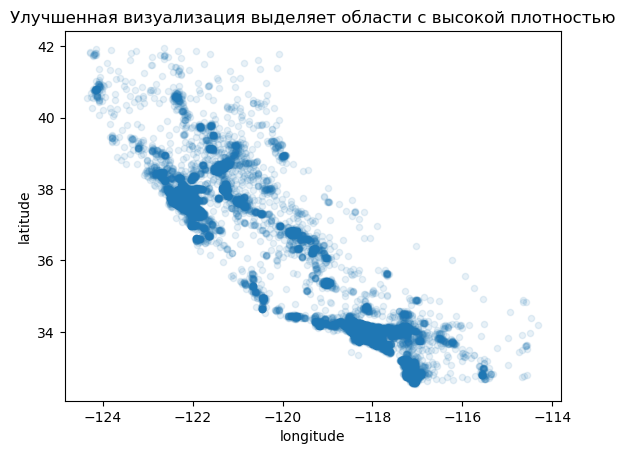

In [76]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, 
             title='Улучшенная визуализация выделяет области с высокой плотностью')

Порой может возникнуть необходимость поэксперементировать с параметрами визуализации, чтобы сделать паттерны более заметными.

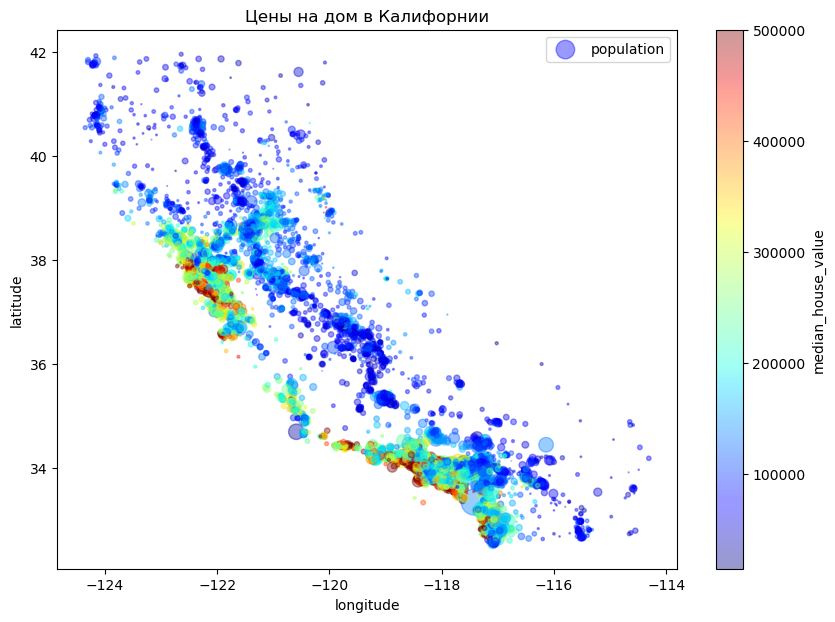

In [74]:
# обратимся к ценам на дома
# параметр s - радиус круга, который представляет население округа
# параметр c - цвет, отвечающий за цену
# пременим карту цветов (параметр cmap) по имени jet

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, 
             label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap('jet'),
            colorbar=True, title='Цены на дом в Калифорнии')
plt.legend()

Возможно, будет полезно воспользоваться каким-то алгоритмом кластеризации, чтобы выявить главные кластеры, и добавить новые признаки, которые измеряют близость к центрам кластеров.

### Поиск связей

Поскольку набор данных не слишком большой, можно легко вычисоить _стандартный коэффициент корреляции (standard correlatation coefficient)_, также называемый _коэффициентом корреляции Пирсона (r) (Pearson's r)_ с применением метода corr():

In [59]:
corr_matrix = housing.corr()

In [62]:
# насколько каждый атрибут связан со средней стоимостью дома
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [63]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


Коэффициент корреляции может упустить из виду нелинейные связи.

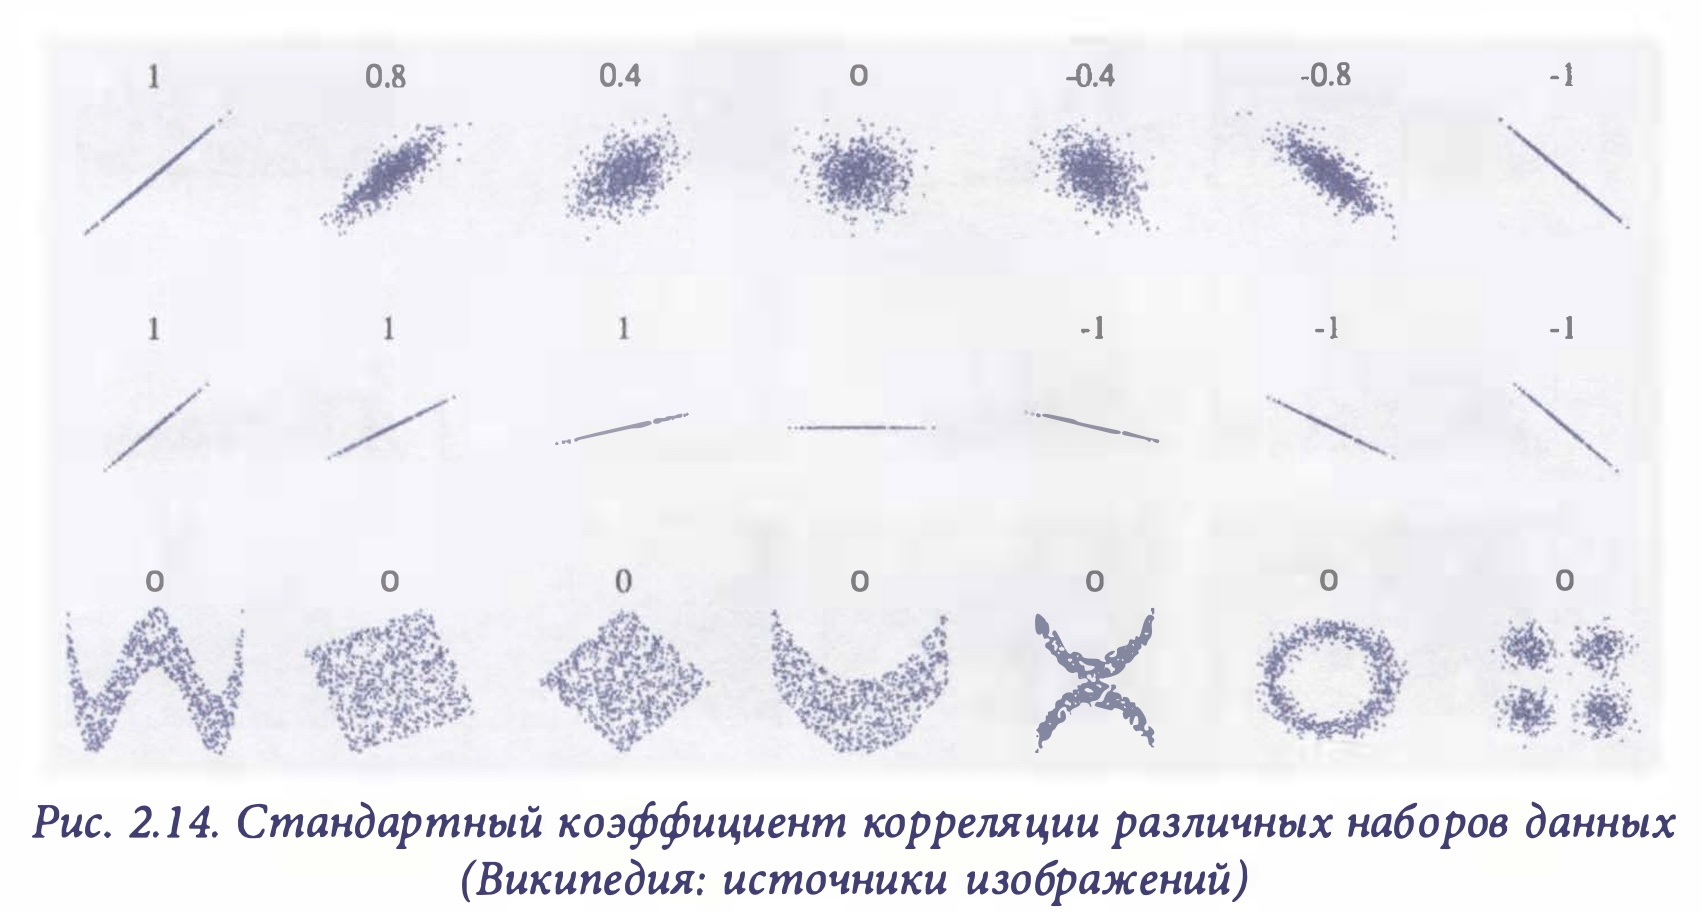

Еще один способ проверки корреляции между аттрибутами предусматривает использование Pandas-функции __scatter\_matrix()__, которая вычерчивает каждый числовой атрибут по отношению к каждому другому числову атрибуту. Например, 11 числовым атрибутам соответствует 121 график.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

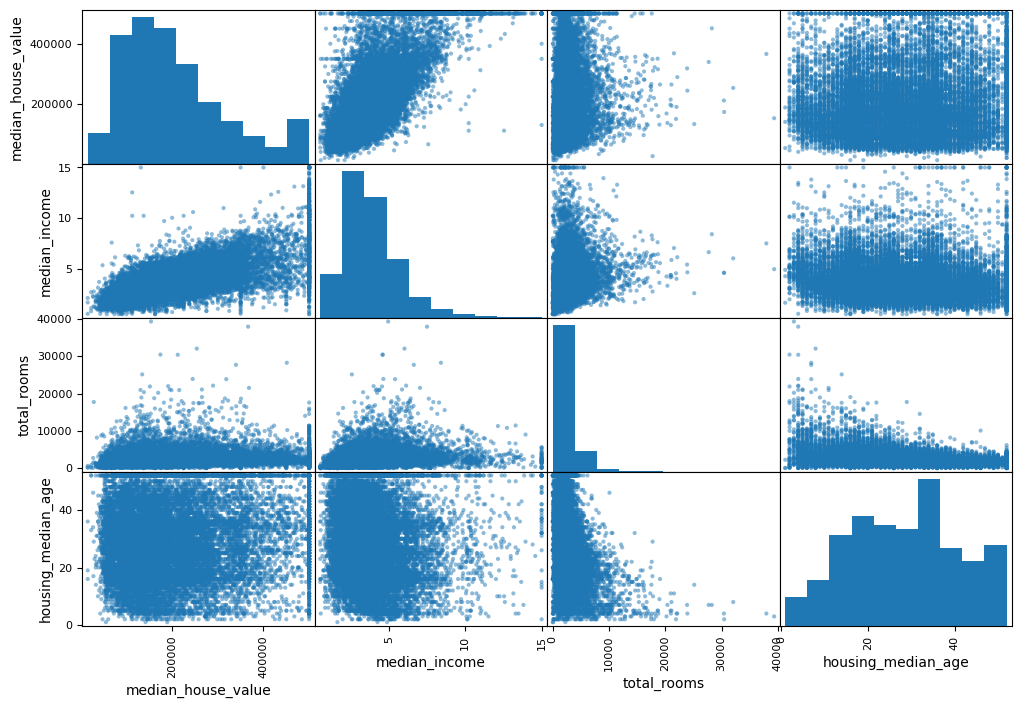

In [73]:
# Матрица рассеяния

from pandas.plotting import scatter_matrix

# Pandas не вычерчивает переменную по отношению самой к себе
# взамен отображает гистограмму каждого атрибута
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:title={'center':'Медианный доход в сравнении со средней стоимостью дома'}, xlabel='median_income', ylabel='median_house_value'>

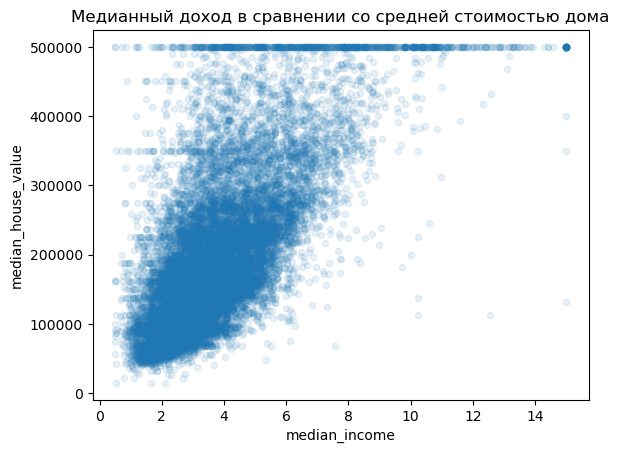

In [69]:
# увеличим график рассеяния корреляции
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, 
             title='Медианный доход в сравнении со средней стоимостью дома')

График выявляет несколько фатов. Можно попробовать удалить соответствующие округи, чтобы алгоритмы не научились воспроизводить такие инливилуальные особенности.

### Эксперементирование с комбинациями атрибутов

Идентифицировали несколько индивидуальных особенностей данных, от которых при желании можно избавиться перед тем, как передавать данные алгоритму МО. Некоторые атрибуты имеют распределением с медленно убывающим звостом, поэтому такие атрибуты может понадобится трансформировать (например, за счет вычисления логарифма).

Последнее, что можно захотеть сделать перед фактической подготовкой данных для алгоритмов МО - опробовать разнообразные комбинации атрибутов.

In [77]:
# создадим новые атрибуты
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [78]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Новый атрибут bedrooms_per_room намного больше связан со средней стоимостью дома, чем общее количество комнат или спален.

Данный раунд исследований вовсе не обязан быть абсолютно исчерпывающим; вопрос в том, чтобы начать все как следует и быстро ухватить суть, что поможет получить первый достаточно хороший прототип. 

Это итеративный процесс: после, того как прототип готов, можно проанализировать его вывод, чтобы обрести еще лучше понимание, и снова возвратиться к шагу исследования.

## Подготовка данных для алгоритмов машинного обучения

Время подготовки данных для алгоритмов МО. Нужно написать для этого функции, для повторной трансформации новых данных.
* Будем постепенно строить библиотеку функций трансформации, которые можно многократно применять в будущих проектах;
* Готовые фукнции можно использовать в действующей системе, чтобы трансформировать новые данные перед передачей в алгоритмы;
* Становится возможным опробование разнообразных трансформаций в целях выяснения, какие сочетания трансформаций работают лучше всего.

In [79]:
# drop() создает копию данных и не влияет на strat_train_set
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Очистка данных

Большинство алгоритмов МО не способны работать с недостающими признаками. Существует три варианта исправить отсутствие ряда значений:
1. избавится от соответсвующих строк;
2. избавится от всего атрибута;
3. установить недостающие значения в некоторую величину (0, среднее, медиана и т.д.)

Все варианты легко реализуются с использованием методов _dropna()_, _drop()_ и _fillna()_ объекта DataFrame.

In [ ]:
housing.dropna(subset=['total_bedrooms'])   # вариант 1
housing.drop('total_bedrooms', axis=1)      # вариант 2
median = housing['total_bedrooms'].median() # вариант 3
housing['total_bedrooms'].fillna(median, inplace=True)

Модуль Scikit-Learn предлагает удобный класс, который заботится об отсутствующих значениях: Imputer.

In [81]:
# необходимо создать экземпляр Imputer
# недостающие значения заменить медианной
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

Медиана может подсчитываться только на числовых атрибутах, требуется создать копию данных без текстового атрибута _ocean\_proximity_:

In [83]:
housing_num = housing.drop('ocean_proximity', axis=1)

Теперь экземпляр imputer можно подогнать к обучающим данным с применением метода __fit()__.

In [84]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

Экземпляр imputer просто подсчитывает медиану каждого атрибута и сохраняет результат в своей переменной экземпляра _statistics\__. Но нельзя иметь уверенность в том, что после начала эксплуатации системы подобное не случится с новыми данными, а потому надежнее применить imputer ко всем числовым атрибутам.

In [85]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [86]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Можно использовать экземпляр _imputer_ для трансформации обучающего набора путем замены недостающих значений известными медианами

In [87]:
X = imputer.transform(housing_num)

Результатом является массив NumPy. Если поместить обратно в Pandas DataFrame, то

In [89]:
housing_rt = pd.DataFrame(X, columns=housing_num.columns)

__Проект Scikit-Learn__

API-интерфейс Scikit-Learn необыкновенно хорошо спроектирован. Ниже перечислены главные проектные принципы:
* Согласованность. Все объекты разделаяют согласованный и простой интерфейс.
    * _Оценщики (estimator)_. Оцненка производится с помощью методы fit(), принимающего в качестве параметра единственный набор данных (или два для алгоритмов обучения с учителем; второй набор данных содержит метки). Любой другой параметр необходимый для управления процессом оценки, считается _гиперпараметром_ (вроде strategy в imputer) и должен быть указан как переменная экземпляра (обычно через параметр конструктора).
    * _Трансформаторы (transformer)_. Некоторые оценщики (типа imputer) могут также трансформировать набор данных; они называются _трансформаторами_. Трансформация выполняется методом transform(), которому в параметре передается набор данных, подлежащий трансформации. Трансформация обычно полагается на изученные параметры, как в случае imputer. Все трансформаторы имеют метод __fit\_transform()__, который эквивалент вызова __fit()__ и затем __transform()__ (временнами выполняется быстрее).
    * _Прогнозаторы (predictor)_. Некоторые оценщики способны вырабатывать прогнозы, имея набор данных; они называются прогнозаторами. Модель LinearRegression является прогнозатором. Прогнозатор располагает методом __predict()__, который принимает набор данных с новыми образцами и возвращает набор данных с соответсвующими прогнозами. прогнозатор имеет метод __score()__, измеряющий качество прогнозов с помощью указанного испытательного набора.
* Инспектирование. Все гиперпараметры прогнозаторов доступны напрямую через переменные экземпляра (например, imputer.strategy), все изученные параметры прогнозаторов также доступны через открытые переменные экземпляра с суффиксом в виде подчеркивания (imputer.strategy_).
* Нераспространение классов. Наборы данных представляются как массивы NumPy или разреженные матрицы SciPy. Гиперпараметры - это просто обычные строки или числа Python.
* Композиция. Из произвольной последовательности трансформаторов легко создать прогнозатор __Pipeline__, за которым находится финальный прогнозатор.
* Разуменые стандартные значения. Scikit-Learn предоставляет обоснованные стандартные значения для большинства параметров, облегчая быстрое создание базовой рабочей системы.

### Обработка текстовых и категориальных атрибутов

In [91]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

Большинство алгоритмов МО предпочитают работать с числами. Преобразуем категории из текста в числа. Можно применить Pandas-метод __factorize()__, который сопоставляет кажду категорию с отличающимся целым числом. Метод __factorize()__ также возвращает список категорий.

In [92]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2])

In [93]:
housing_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

Одна проблема, алгоритмы МО будут предполагать, что два соседних значения более похожи, чем два отдаленных значения. Решением является создание одного двоичного атрибута на категорию: один атрибут равен 1, когда категорией является определенное значение, и 0 в противном случае. Такой прием называется _кодированием с одним активным состоянием или унитарным кодированием (one-hot encoding)_.

Модуль Scikit-Learn предлагает кодировщик __OneHotEncoder__ для преобразования целочисленных категориальных значений в векторы в унитарном коде.

In [94]:
# закодируем категории как векторы в унитарном коде
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

In [95]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Метод __fir\_transform()__ ожидает двумерный массив, но housing_cat_encoded - одномерный массив, а потому его форму необходимо изменить. Выводом является разреженная матрица SciPy, а не массив NumPy. После унитарного кодирования получается матрица, содержащая тысячи столбцов, которая полна нулей за исключением единственной единицы на строку. Расходывание массы памяти является расточительством. Разреженная матрица хранит только позиции ненулевых элементов. 

Если нужно преобразовать разреженную матрицу в массив NumPy, тогда нужно вызвать метод __toarray()__.

In [96]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

Можно применять обе трансформации (текстовых категорий в целочисленные категории и затем целочисленных категорий в векторы в унитарном коде) за один раз, используя класс CategoricalEncoder.

In [108]:
# применим класс CategoricalEncoder (OneHotEncoder)
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

По умолчанию класс CategoricalEncoder выводит разреженную матрицу, но можно установить кодирование в "onehot-dense", если нужна плотная матрица.

In [109]:
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot = cat_encoder.transform(housing_cat_reshaped)
housing_cat_1hot

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

С использованием переменной экземпляра categories_ можно получить список категорий. Он представляет собой список, содержащий одномерный массив категорий для каждого категориального атрибута.

In [102]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Если категориальный атрибут имеет крупное число возможных категорий, тогда унитарное кодирование приведет к большому количеству входных признаков. В результате может замедлится обучение и ухудшиться производительность.  Можно создать более влотные представления, называемые __вложениями(embedding)__, но для этого требуется понимание нейронных сетей.

### Специальные трансформаторы

Scikit-Learn предлагает много полезных трансформаторов, но придется писать собственные трансформаторы для операций чистки и комбинирования специфических атрибутов. Нужно стремится обеспечить бесшовную работу собственных трансформаторов с функциональностью Scikit-Learn (такой как конвейеры), а поскольку Scikit-Learn полагается на утиную типизацию (не наследование), потребуется лишь создать класс и реализовать три метода: _fit()_, _transform()_ и _fit_transform()_. Последний метод можно получить свободно, просто добавив TransformerMixin в качестве базового класса. Если добавите BaseEstimator как базовый класс (отказаться от \*args и \*\*kargs), тогда получится два дополнительных метода (get_params() и set_params()), которые будут полезны для автоматической настройки гиперпараметров.

In [110]:
# Трансформатор, добавляющий скомбинированные атрибуты

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # ни остается ничего другого
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, rooms_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Гиперпараметр add_bedrooms_per_room (по умолчанию True) позволит легко выяснить, помогает ли алгоритмам МО добавление данного атрибута или нет.

Чем больше автоматизации для подготовки данных, тем больше комбинаций можно опробовать автоматически и тем выше вероятность, что найдется замечательная комбинация (сэкономив много времени).

### Масштабирование признаков

Одной из самых важных  трансформаций является __масштабирование признаков (feature scaling)__. Масштрабирование целевых значений обычно не требуется.

Существует два распрастраненных способа обеспечения того же самого масштаба у всех атрибутов: __масштабирование по минимаксу (min-max scaling)__ и __стандартизация (standardization)__. Масштабирование по минимаксу часто называют __нормализацией (normalization)__: значения смещаются и изменяются так, чтобы в итоге находится в диапазоне от 0 до 1. Это делается путем вычитания минимального значения и деления на разность максимального и минимального значений. В Scikit-Learn предназначен трансформатор _MinMaxScaler_ с гиперпараметром __feature\_range__, который позволяет изменять диапозон, если 0-1 не устраивает.

Стандартизация совершенно другая: сначала вычитается среднее значение и затем производится деление на дисперсию. В отличие от масштабирования стандартизация вовсе не привязывает значения к специфическому диапазону, что может оказаться проблемой для некоторых алгоритмов. Однако, стандартизация гораздо менее подвержена влиянию выбросов. Для стандартизации Scikit-Learn предлагает трансформатор _StandardScaler_.

_Масштабирующие трансформаторы важно подгонять только к обучающим данным, а не к полному набору данных._

### Конвейеры трансформации

Много шагов трфнсформации данных, которые необходимо выполнять в правильном порядке. Scikit-Learn предоставляет класс __Pipeline__, который поможет справиться с такими последовательностями трансформаций.

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', OneHotEncoder()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

Конструктор _Pipeline_ принимает список пар "имя/оценщик", определяющий последовательность шагов. Все кроме последнего оценщика обязаны быть трансформаторами (т.е. они должны иметь метод _fit\_transform()_). Имена могут быть любыми (пока не содержат два подчеркивания)).

Вызов метода _fit()_ конвейера приводит к последовательному вызову методов _fit\_transform()_ всех трансформаторов с передачей вывода каждого вызова в качестве параметра следующему вызову до тех пор, пока не будет достигнут последний оценщик, для которого просто вызывается метод _fit()_.

Неплохо иметь возможность передавать Pandas-объект DataFrame прямо в конвейер вместо того, чтобы сначала вручную извлекать числовые столбцы в массив NumPy. В Scikit-Learn нет ничего для обработки Pandas-объектов DataFrame. Можно написать трансформатор:

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Класс _DataFrameSelector_ будет трансформировать данные за счет выбора желаемых аргументов, отбрасывания остальных и преобразования результирующего объекта DataFrame в массив NumPy. Класс _ColumnTransformer_ облегчает специфичные  для атрибутов трансформации. В _sklearn-pandas_ можно получить класс _DataFrameMapper_  предназначеный для похожей цели, что и _DataFrameSelector_.

С той же легкостью можно написать конвейер для категориальных атрибутов, тоже просто выбирая категориальные атрибуты с применением объекта _DataFrameSelector_ и затем объекта _CategoricalEncoder_.

In [137]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_attribs)),
                    ('imputer', SimpleImputer(strategy='median')),
                    ('attribs_adder', CombinedAttributesAdder()),
                    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_attribs)),
                    ('cat_encoder', OneHotEncoder()),
])

Чтобы объединить два конвейера в один, нужно воспользоваться классом _FeatureUnion_ из Scikit-Learn. Ему передается список трансформаторов (который может содержать целые конвейеры трансформаторов); когда вызывается его метод _transform()_, он параллельно запускает методы _transform()_ всех трансформаторов, ожидает их вывода, затем объединяет выводы и возвращает результат. Полный конвейер, обрабатывающий числовые и категориальные атрибуты, может выглядеть следующим образом:

In [138]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
                                                ('num_pipeline', num_pipeline),
                                                ('cat_pipeline', cat_pipeline),
])

In [139]:
# Целый конвейер запускается просто

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<16512x25247 sparse matrix of type '<class 'numpy.float64'>'
	with 313728 stored elements in Compressed Sparse Row format>

In [140]:
housing_prepared.shape

(16512, 25247)

## Выбор и обучение модели

Произвели выборку обучающего и испытательного наборов, написали конвейеры трансформации, чтобы автоматически очистить и подготовить данные для алгоритвом МО. Теперь приступаем к выбору и обучению модели.

### Обучение и оценка с помощью обучающего набора

Сначала обучим модель с линейной регререссией (LinearRegression).

In [141]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Есть готовая модель с линейной регрессией. Опробуем на нескольких образцах из обучающего набора.

In [142]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Прогнозы:', lin_reg.predict(some_data_prepared))
print("Метки", list(some_labels))

Прогнозы: [ 72099.57097918 279599.88011942  82697.48913278 112496.62685263
 238301.97789064]
Метки [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Модель работает не точно. Измерим ошибку RMSE этой регрессионной модели, используя функцию __mean\_squared\_error()__ из Scikit-Learn:

In [143]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.4022191552083103